In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
import math
import validate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import PR_curve
from sklearn.cluster import KMeans

In [2]:
data_dir='fixed_csv_label_ver2'
original = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
df = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
df=df[df['day']<=9]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
3995345,45.9,0,5,9
3995346,45.6,0,5,9
3995347,45.8,0,5,9
3995348,45.7,0,5,9


In [3]:
def make_data(x, str,w):
    x=pd.DataFrame(x)
    window=w
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    return x

def make_label(x, w):
    window=w
    x['label_all']=x['label']
    for i in range(1, window):
        x.loc[(x['label_all']==1)|(x['label'].shift(i)==1), 'label_all']=1
        x.loc[(x['label_all']==0)&(x['label'].shift(i)==0), 'label_all']=0
    
    x['label']=x['label_all']
    return x[['label']]

df_list=[]
for i in set(df['day']):
    lag=[] 
    window=5
    lag.append(make_data(df.loc[df['day']==i, ['original']], 'original', window))
    lag.append(df.loc[df['day']==i, ['day']])
    df_add_lag=pd.concat(lag, axis=1)
    df_list.append(df_add_lag)
df=pd.concat(df_list)
df=df.dropna().reset_index(drop=True)
df['d']=0
df['z']=0
df

,original,original_lag1,original_lag2,original_lag3,original_lag4,day,d,z
0,53.6,53.2,52.8,52.8,53.4,0,0,0
1,54.0,53.6,53.2,52.8,52.8,0,0,0
2,54.7,54.0,53.6,53.2,52.8,0,0,0
3,55.7,54.7,54.0,53.6,53.2,0,0,0
4,55.5,55.7,54.7,54.0,53.6,0,0,0
...,...,...,...,...,...,...,...,...
3995305,45.9,45.6,45.4,45.9,46.0,9,0,0
3995306,45.6,45.9,45.6,45.4,45.9,9,0,0
3995307,45.8,45.6,45.9,45.6,45.4,9,0,0
3995308,45.7,45.8,45.6,45.9,45.6,9,0,0


## クロスバリデーション（パラメータチューニング）

In [4]:
cv_data_list=df['day'].unique().tolist()
#テストデータ
test_notvalid=[]

In [5]:
for i in range(len(test_notvalid)):
    #検証データ＋訓練データ
    cv_data_list.remove(test_notvalid[i])
cv_data_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

訓練データ：[1, 2, 3, 4, 5, 6, 7, 8, 9]
検証データ：[0]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


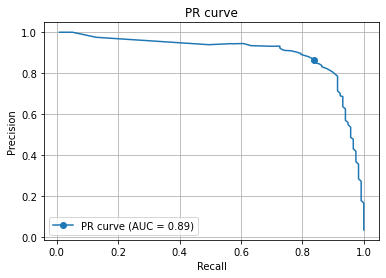

AUC：0.8915461102855934
理想の閾値：0.19946808510638298
F値（最高）：0.8513473622063847
適合率（最高）：0.865546218487395
再現率（最高）：0.8376068376068376
----------------閾値の妥当性評価（F値）------------------
閾値0.18397530274444596
F値：0.8457539998552088
適合率：0.8212237093690249
再現率：0.8717948717948718

訓練データ：[0, 2, 3, 4, 5, 6, 7, 8, 9]
検証データ：[1]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


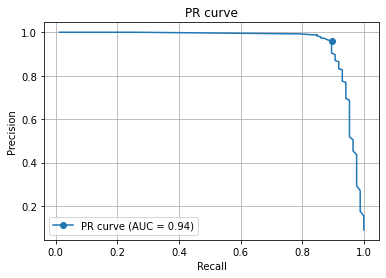

AUC：0.9432954360067101
理想の閾値：0.23138297872340424
F値（最高）：0.9264326327841493
適合率（最高）：0.9597523219814241
再現率（最高）：0.8953488372093024
----------------閾値の妥当性評価（F値）------------------
閾値0.2759354048671766
F値：0.8359137713904733
適合率：0.994535519125683
再現率：0.7209302325581395

訓練データ：[0, 1, 3, 4, 5, 6, 7, 8, 9]
検証データ：[2]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


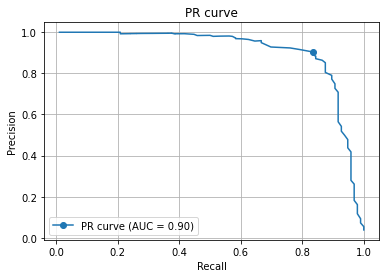

AUC：0.8984142418056424
理想の閾値：0.1276595744680851
F値（最高）：0.8674054260603745
適合率（最高）：0.9043824701195219
再現率（最高）：0.8333333333333334
----------------閾値の妥当性評価（F値）------------------
閾値0.10466412536169532
F値：0.8432847501634272
適合率：0.7965594614809275
再現率：0.8958333333333334

訓練データ：[0, 1, 2, 4, 5, 6, 7, 8, 9]
検証データ：[3]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


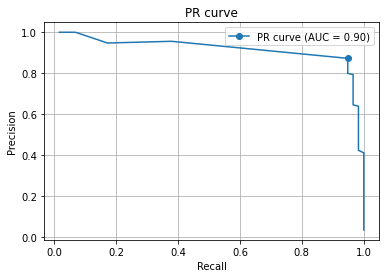

AUC：0.9013294319395212
理想の閾値：0.26
F値（最高）：0.9087245617570018
適合率（最高）：0.8723404255319149
再現率（最高）：0.9482758620689655
----------------閾値の妥当性評価（F値）------------------
閾値0.3685601917390289
F値：0.6939537555651301
適合率：0.934984520123839
再現率：0.5517241379310345

訓練データ：[0, 1, 2, 3, 5, 6, 7, 8, 9]
検証データ：[4]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


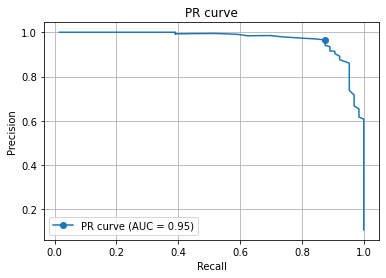

AUC：0.9533632580655527
理想の閾値：0.14627659574468085
F値（最高）：0.9178096986715627
適合率（最高）：0.9650238473767886
再現率（最高）：0.875
----------------閾値の妥当性評価（F値）------------------
閾値0.1292905094208483
F値：0.9061899159181565
適合率：0.9223085460599334
再現率：0.890625

訓練データ：[0, 1, 2, 3, 4, 6, 7, 8, 9]
検証データ：[5]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


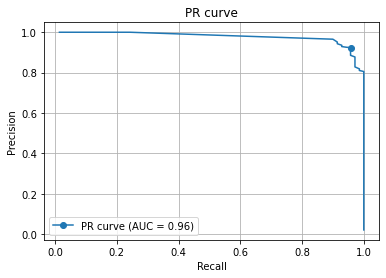

AUC：0.9638551391170129
理想の閾値：0.23138297872340424
F値（最高）：0.940055155063138
適合率（最高）：0.9235668789808917
再現率（最高）：0.9571428571428572
----------------閾値の妥当性評価（F値）------------------
閾値0.24128530398474357
F値：0.9299526707234618
適合率：0.9313380281690141
再現率：0.9285714285714286

訓練データ：[0, 1, 2, 3, 4, 5, 7, 8, 9]
検証データ：[6]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


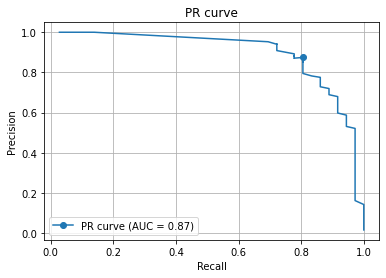

AUC：0.8720213493196357
理想の閾値：0.2074468085106383
F値（最高）：0.8386370370370371
適合率（最高）：0.8745519713261649
再現率（最高）：0.8055555555555556
----------------閾値の妥当性評価（F値）------------------
閾値0.17972859388772028
F値：0.8046459106307469
適合率：0.8037383177570093
再現率：0.8055555555555556

訓練データ：[0, 1, 2, 3, 4, 5, 6, 8, 9]
検証データ：[7]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


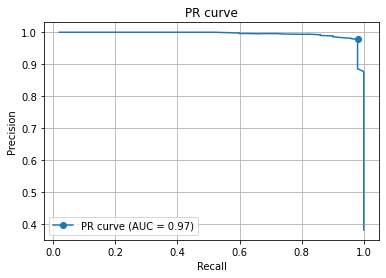

AUC：0.9743153812609613
理想の閾値：0.09574468085106383
F値（最高）：0.9787640860827468
適合率（最高）：0.9775312855517634
再現率（最高）：0.98
----------------閾値の妥当性評価（F値）------------------
閾値0.11924298107983088
F値：0.921450293500554
適合率：0.99235807860262
再現率：0.86

訓練データ：[0, 1, 2, 3, 4, 5, 6, 7, 9]
検証データ：[8]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


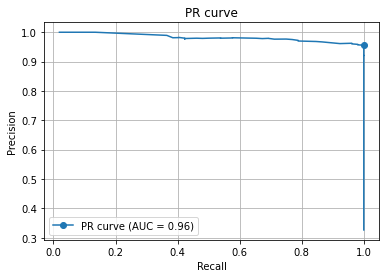

AUC：0.9632638660132163
理想の閾値：0.1595744680851064
F値（最高）：0.9775033083370093
適合率（最高）：0.9559965487489215
再現率（最高）：1.0
----------------閾値の妥当性評価（F値）------------------
閾値0.18666863706842185
F値：0.9031451907838596
適合率：0.9683680805176133
再現率：0.8461538461538461

訓練データ：[0, 1, 2, 3, 4, 5, 6, 7, 8]
検証データ：[9]日目
------------異常検知モデルの性能評価（PR曲線AUC）-------------


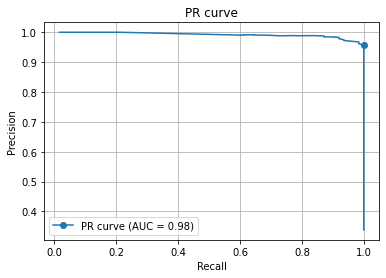

AUC：0.9758404362793579
理想の閾値：0.18085106382978722
F値（最高）：0.9776662484316185
適合率（最高）：0.9563082965144821
再現率（最高）：1.0
----------------閾値の妥当性評価（F値）------------------
閾値0.1891221110856209
F値：0.9757852713213826
適合率：0.9678313921242374
再現率：0.9838709677419355

----------------総合評価------------------
・異常検知モデルの性能
	AUC平均：0.9337244650093203
・閾値の妥当性
	f値平均：0.8660075529852399


In [6]:
auc_sum=0
f_score_sum=0
#検証データを何日にするか
valid_daynum=1
cv_comb=np.array(cv_data_list).reshape((-1, valid_daynum)).tolist()
for i in cv_comb:
    print(f'訓練データ：{[k for k in cv_data_list if k not in i]}')
    print(f'検証データ：{i}日目')

    test_day=i
    train=df[(~df['day'].isin(test_day))][df.columns[:-3]].reset_index(drop=True)
    test=df[(df['day'].isin(test_day))][df.columns[:-3]].reset_index(drop=True)

    nk = 21
    neigh = NearestNeighbors(n_neighbors=nk)
    neigh.fit(train)
    d = neigh.kneighbors(test)[0]
    d = np.mean(d, axis=1)
    mx = np.max(d)
    d = d / mx
    df.loc[(df['day'].isin(test_day)), 'd']=d
    
    test_v=original[original['day'].isin(test_day)][['original', 'label', 'day']].reset_index(drop=True)
    test_v['d']=d[0]
    for day in test_day:
        tmp=test_v.loc[test_v['day']==day,  'd']
        tmp[window-1:]=df.loc[(df['day']==day), 'd'].values
        test_v.loc[test_v['day']==day,  'd']=tmp
    
    d_test=test_v['d'].values
    print('------------異常検知モデルの性能評価（PR曲線AUC）-------------')
    thr_bins=100
    p_score, r_score, f_score, thresholds, thr, auc = PR_curve.fig_pr(test_v, d_test, thr_bins)
    print('\033[31m'+f'AUC：{auc}'+'\033[0m')
    print(f'理想の閾値：{thr}')
    print(f'F値（最高）：{f_score.max()}')
    print(f'適合率（最高）：{p_score[np.argmax(f_score)]}')
    print(f'再現率（最高）：{r_score[np.argmax(f_score)]}')
    auc_sum+=auc
    print('----------------閾値の妥当性評価（F値）------------------')
 
    #kmeans
    n_clusters=2
    model = KMeans(n_clusters=n_clusters)  
    model.fit(d.reshape((-1, 1)))
    clusters = model.predict(d.reshape((-1, 1)))  
    result=pd.DataFrame({'d':d, 'cluster':clusters})
    thr_list=[]
    for j in range(n_clusters):
        thr_list.append(result.loc[result['cluster']==j, 'd'].max())
    thr_min=sorted(thr_list)[-2]
    thr_max=sorted(thr_list)[-1]
    thr_range=result.loc[(result['d']>thr_min)&(result['d']<=thr_max), ['d']]
    Q1 = thr_range.quantile(0.25)
    Q3 = thr_range.quantile(0.75)
    IQR = Q3 - Q1
    thr = min(float(Q3 + 1.5 * IQR), thr_max)
    print(f'閾値{thr}')
    
    precision, recall=validate.validate(test_v, d_test, thr)
    f_score=(2*precision*recall)/(precision+recall)
    print('\033[31m'+f'F値：{f_score}'+'\033[0m')
    print(f'適合率：{precision}')
    print(f'再現率：{recall}')
    f_score_sum+=f_score

    z=np.where(d>=thr, 1, 0)
    df.loc[(df['day'].isin(test_day)), 'z']=z
    print('=====================================================================================\n')
auc_mean=auc_sum/len(cv_comb)
f_mean=f_score_sum/len(cv_comb)
print('----------------総合評価------------------')
print('・異常検知モデルの性能')
print(f'\tAUC平均：{auc_mean}')
print('・閾値の妥当性')
print(f'\tf値平均：{f_mean}')

## テストデータの評価

In [7]:
print(f'訓練データ：{cv_data_list}')
print(f'テストデータ：{test_notvalid}日目')

train=df[(df['day'].isin(cv_data_list))][df.columns[:-3]].reset_index(drop=True)
test=df[(df['day'].isin(test_notvalid))][df.columns[:-3]].reset_index(drop=True)

neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)
d = neigh.kneighbors(test)[0]
d = np.mean(d, axis=1)
mx = np.max(d)
d = d / mx

test_v=original[original['day'].isin(test_notvalid)][['original', 'label']].reset_index(drop=True)
test_v['d']=d[0]
test_v.loc[window-1:, 'd']=d

#kmeans
n_clusters=2
model = KMeans(n_clusters=n_clusters)  
model.fit(d.reshape((-1, 1)))
clusters = model.predict(d.reshape((-1, 1)))  
result=pd.DataFrame({'d':d, 'cluster':clusters})
thr_list=[]
for j in range(n_clusters):
    thr_list.append(result.loc[result['cluster']==j, 'd'].max())
thr_min=sorted(thr_list)[-2]
thr_max=sorted(thr_list)[-1]
thr_range=result.loc[(result['d']>thr_min)&(result['d']<=thr_max), ['d']]
Q1 = thr_range.quantile(0.25)
Q3 = thr_range.quantile(0.75)
IQR = Q3 - Q1
thr = min(float(Q3 + 1.5 * IQR), thr_max)
print(f'閾値{thr}')

d_test=test_v['d'].values
precision, recall=validate.validate(test_v, d_test, thr)
f_score=(2*precision*recall)/(precision+recall)
print(f'適合率：{precision}')
print(f'再現率：{recall}')
print(f'f値：{f_score}')

訓練データ：[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
テストデータ：[]日目


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.